# pre

In [1]:
getwd()

[1] "/share/Data/hxie/project/202305/esc_xwliu/esc1014_halfday/RNA_analysis"

In [4]:
library(Seurat)
library(tidyverse)
library(ggplot2)
library(patchwork)
# source("/shareb//zliu//analysis/hires_gastrulation/CHARMtools/Rlibs/plotFun.R")

In [5]:
esc.data <- read.csv("../result/RNA_Res_1018/counts.gene.total.format.tsv",sep = "\t") 

In [6]:
dim(esc.data)

[1] 37985  1290

In [7]:
stat1 <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0420/stat/cells0407.stat.csv") %>% rename(`200k` = X200k,`50k` = X50k, `20k` = X20k, `1m` = X1m)
stat2 <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0420/stat/esc0420.stat.csv") %>% select(-X) %>% mutate(day = str_extract(cellname, "d[0-9]+"), sample = "s0420") %>% rename(`200k` = X200k,`50k` = X50k, `20k` = X20k, `1m` = X1m)
stat3 <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0504/stat/stat0504.csv") %>% mutate(day = str_extract(cellname, "d[0-9]+"), sample = "s0504")
stat4 <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0728/stat/esc0728.csv") %>% mutate(day = str_extract(cellname, "d[0-9]+"), sample = "s0728") %>% select(-`...1`)
stat5 <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc1014_halfday/stat/stat_1016.csv") %>% mutate(day = str_extract(cellname, "d[0-9]+"), sample = "s1014")

Rows: 424 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): cellname, sample, day
dbl (26): Rawreads, DNAreads, RNAreads, yperx, raw_pairs, pairs_dedup, pairs...
lgl  (1): QC2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 12 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): cellname
dbl (27): X, Rawreads, DNAreads, RNAreads, yperx, raw_pairs, pairs_dedup, pa...
lgl  (1): QC2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 381 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): cellname
dbl (26): Rawreads, DNAreads, RNAreads, yperx, raw_pairs, pairs_dedup, pairs...

In [8]:
stats <- rbind(stat1,stat2,stat3,stat4,stat5)

In [91]:
# stats %>% write_csv("/share/Data/hxie/project/202209/esc_xwliu/esc1014_halfday/stat/stat_all_1025.csv")

# create seurat object

In [55]:
esc <- CreateSeuratObject(counts = esc.data, min.cells = 1, min.features = 1)
esc@meta.data <- esc@meta.data %>% mutate(cellname = rownames(esc@meta.data))

In [56]:
meta.data <- esc@meta.data %>% left_join(stats) %>% mutate(temp = cellname) %>% column_to_rownames("temp")
esc@meta.data <- meta.data

Joining with `by = join_by(cellname)`


In [59]:
esc <- subset(esc, subset = !(nCount_RNA > 50000 & pairs_clean3 > 500000) & nCount_RNA > 500 & pairs_clean3 > 50000 & QC2 == TRUE) # chromExistpass == TRUE &

In [60]:
esc

An object of class Seurat 
37985 features across 1101 samples within 1 assay 
Active assay: RNA (37985 features, 0 variable features)

In [61]:
dim(esc@meta.data)

[1] 1101   33

In [62]:
# esc@meta.data %>% write.csv("/share/home/hxie/project/202209/esc_xwliu/esc0504/RNA_analysis/batchCorrection/metadata_allgene_0529.csv")

In [63]:
esc <- NormalizeData(esc)

genes <- esc[["RNA"]]@data %>% as.data.frame %>% rownames
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
s.genes <- tolower(s.genes) %>% str_to_title()
g2m.genes <- tolower(g2m.genes) %>% str_to_title()
s.genes <- intersect(genes, s.genes)
g2m.genes <- intersect(genes, g2m.genes)

esc <- CellCycleScoring(esc, s.features = s.genes, g2m.features = g2m.genes,set.ident = TRUE)
esc <-AddModuleScore(esc,features = list(CC.Score= c(cc.genes$s.genes,cc.genes$g2m.genes)))

Warning message:
“The following features are not present in the object: MCM5, PCNA, TYMS, FEN1, MCM2, MCM4, RRM1, UNG, GINS2, MCM6, CDCA7, DTL, PRIM1, UHRF1, MLF1IP, HELLS, RFC2, RPA2, NASP, RAD51AP1, GMNN, WDR76, SLBP, CCNE2, UBR7, POLD3, MSH2, ATAD2, RAD51, RRM2, CDC45, CDC6, EXO1, TIPIN, DSCC1, BLM, CASP8AP2, USP1, CLSPN, POLA1, CHAF1B, BRIP1, E2F8, HMGB2, CDK1, NUSAP1, UBE2C, BIRC5, TPX2, TOP2A, NDC80, CKS2, NUF2, CKS1B, MKI67, TMPO, CENPF, TACC3, FAM64A, SMC4, CCNB2, CKAP2L, CKAP2, AURKB, BUB1, KIF11, ANP32E, TUBB4B, GTSE1, KIF20B, HJURP, CDCA3, HN1, CDC20, TTK, CDC25C, KIF2C, RANGAP1, NCAPD2, DLGAP5, CDCA2, CDCA8, ECT2, KIF23, HMMR, AURKA, PSRC1, ANLN, LBR, CKAP5, CENPE, CTCF, NEK2, G2E3, GAS2L3, CBX5, CENPA, not searching for symbol synonyms”
Warning message in AddModuleScore(esc, features = list(CC.Score = c(cc.genes$s.genes, :
“Could not find enough features in the object from the following feature lists: CC.Score Attempting to match case...”


In [64]:
esc@meta.data <- esc@meta.data %>% mutate(sample2 = ifelse(sample == "s1207", "s1207",
                                                    ifelse(sample == "s1014", "s1014", ifelse(sample == "s0728", "s0728","s0504"))))

In [65]:
esc@meta.data <- esc@meta.data %>% mutate(sample3 = ifelse(sample2 == "s0504", "s0504","others"))

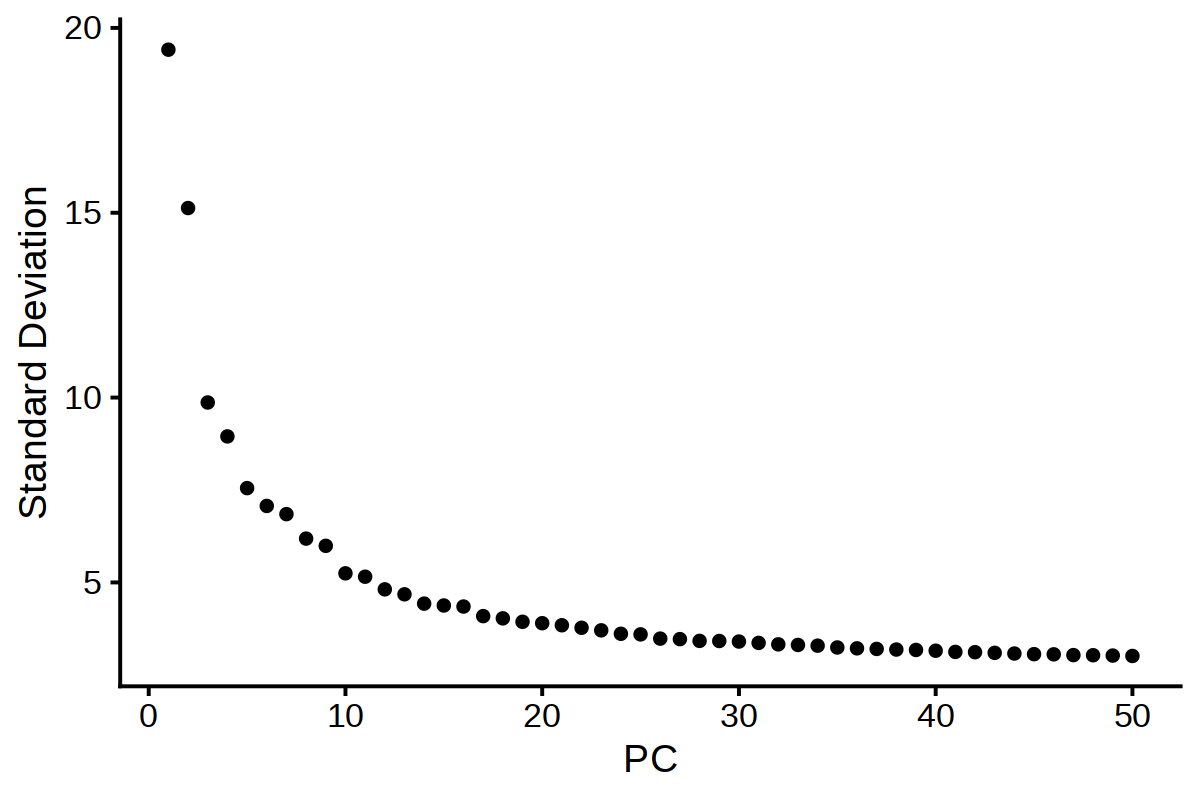

In [66]:
esc <- SCTransform(esc, vst.flavor = "v2", verbose = FALSE)
esc <- RunPCA(esc, verbose = FALSE)
options(repr.plot.width = 6,repr.plot.height = 4)
ElbowPlot(object = esc, ndims = 50)

In [67]:
library(harmony)
set.seed(42)

In [68]:
esc <- esc %>% RunHarmony("sample3", assay.use="SCT")

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony converged after 5 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.SCT.harmony; see ?make.names for more details on syntax validity”


In [70]:
esc <- RunUMAP(esc, dims = 1:16,n.neighbors=30, verbose = FALSE, reduction = "harmony")
esc <- FindNeighbors(esc, dims = 1:16, reduction = "harmony") %>% FindClusters(resolution = 0.3, verbose = FALSE)

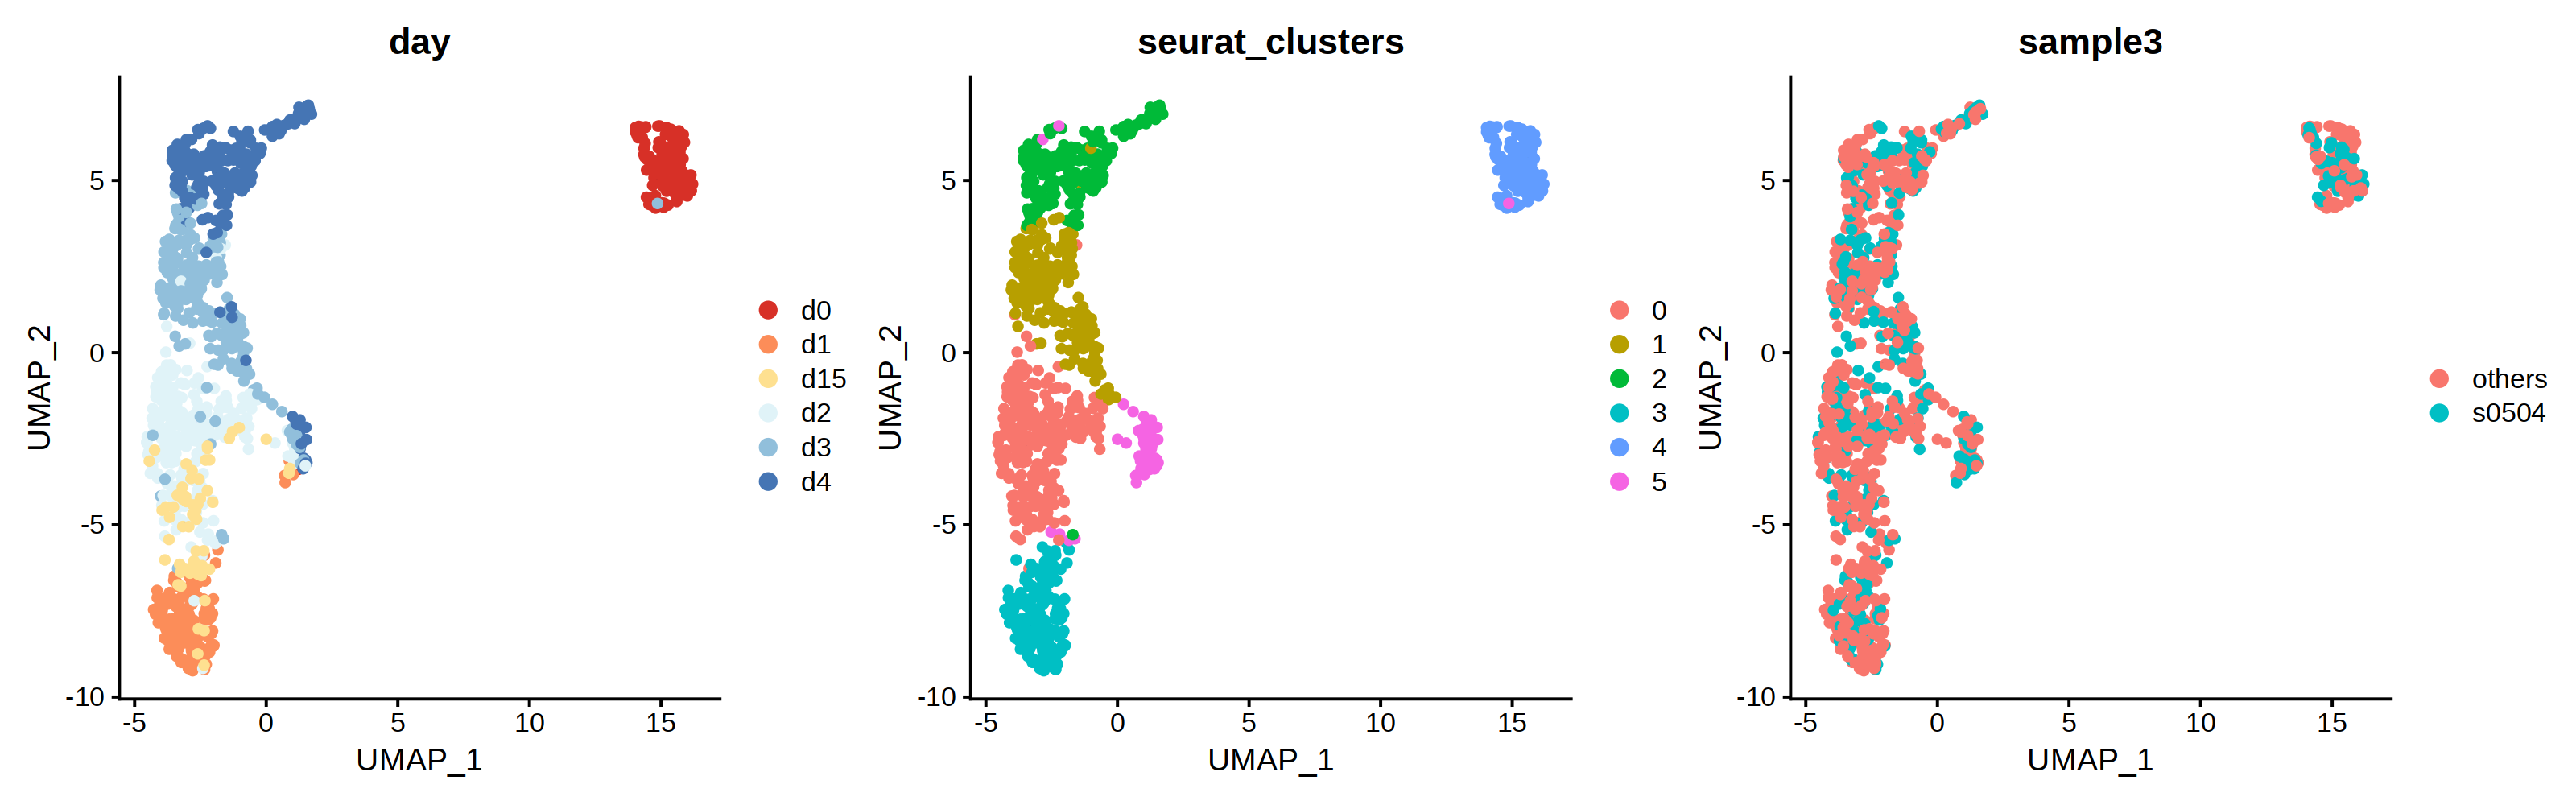

In [72]:
options(repr.plot.width = 16,repr.plot.height=5, repr.plot.res = 200)
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
p1 <- DimPlot(esc, reduction = "umap", group.by = 'day', label = T, pt.size = 1.5, label.size = 0,repel = T,cols=alpha(colors,1))
p2 <- DimPlot(esc, reduction = "umap", group.by = 'seurat_clusters', label = T, pt.size = 1.5, label.size = 0,repel = T)
p3 <- DimPlot(esc, reduction = "umap", group.by = 'sample3', label = T, pt.size = 1.5, label.size = 0,repel = T)
p1 | p2 | p3

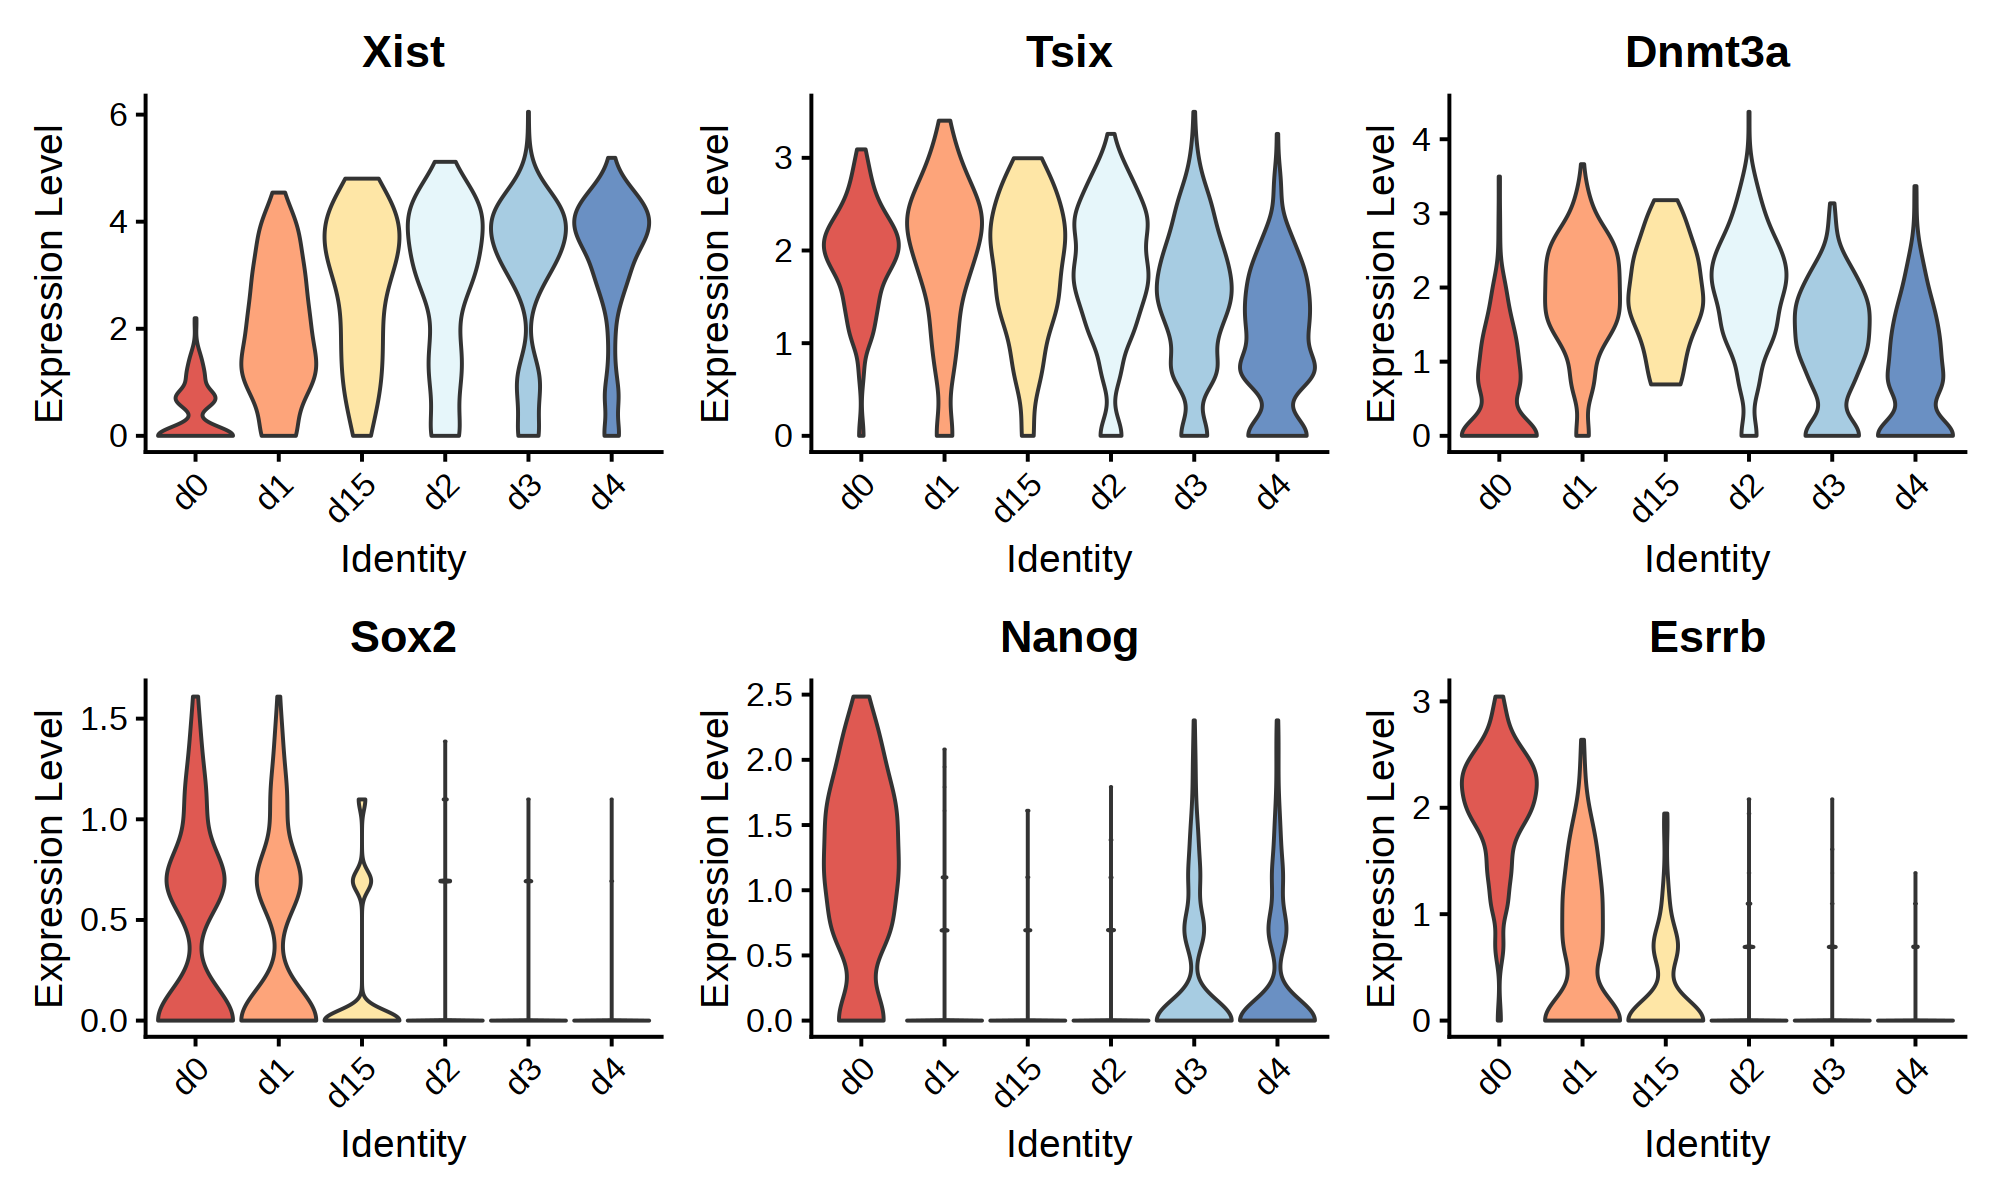

In [73]:
options(repr.plot.width = 10,repr.plot.height=6,repr.plot.res = 200)
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
VlnPlot(object = esc, features = c("Xist","Tsix","Dnmt3a","Sox2","Nanog","Esrrb"), group.by = 'day',cols=alpha(colors,0.8), ncol=3, pt.size=0) 

In [81]:
esc

An object of class Seurat 
64478 features across 1101 samples within 2 assays 
Active assay: SCT (26493 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap

In [82]:
# saveRDS(esc, "./RDS/esc_total_1101.rds")

# cellcycle

In [2]:
esc <- readRDS("./RDS/esc_total_1101.rds")

In [3]:
cellcycle <- read.csv("/share/Data/hxie/project/202209/esc_xwliu/esc1014_halfday/RNA_analysis/cellcycle/esc_total_1101_cellcycle_metadata.csv", row.names = 1) %>% select(cellname,cellcycle_threshold)

In [4]:
esc@meta.data <- esc@meta.data %>% left_join(cellcycle, by = "cellname") %>% mutate(temp = cellname) %>% column_to_rownames("temp")

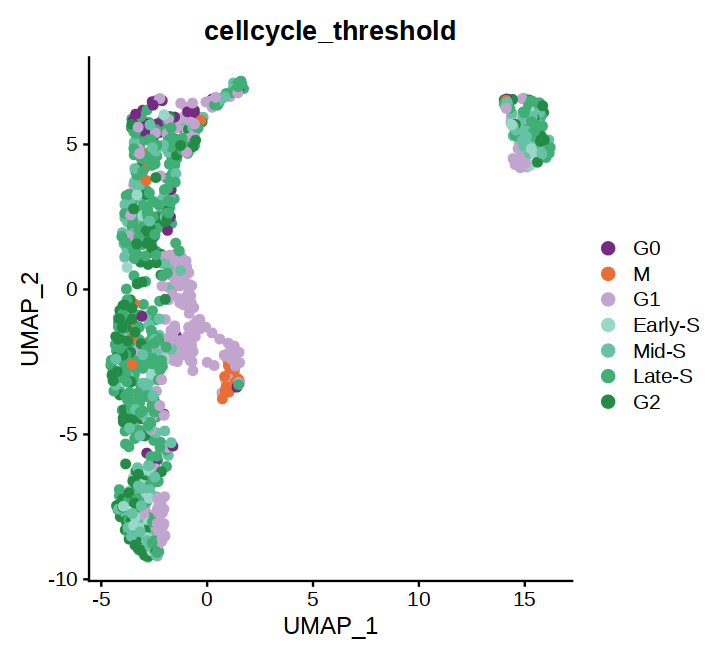

In [8]:
options(repr.plot.width = 6,repr.plot.height=5.5)
cellcyclecolors = c("G0"="#762a83","G1"="#c2a5cf","Early-S"="#99d8c9","Mid-S"="#66c2a4","Late-S"="#41ae76","G2"="#238b45","M"="#ea6e34","Unknown"="gray")
esc@meta.data$cellcycle_threshold <- factor(esc@meta.data$cellcycle_threshold, levels = c("G0","M","G1","Early-S","Mid-S","Late-S","G2"))
DimPlot(esc, reduction = "umap", group.by = 'cellcycle_threshold', label = F, pt.size = 2, repel = T,cols=alpha(cellcyclecolors,1))

`summarise()` has grouped output by 'seurat_clusters'. You can override using
the `.groups` argument.


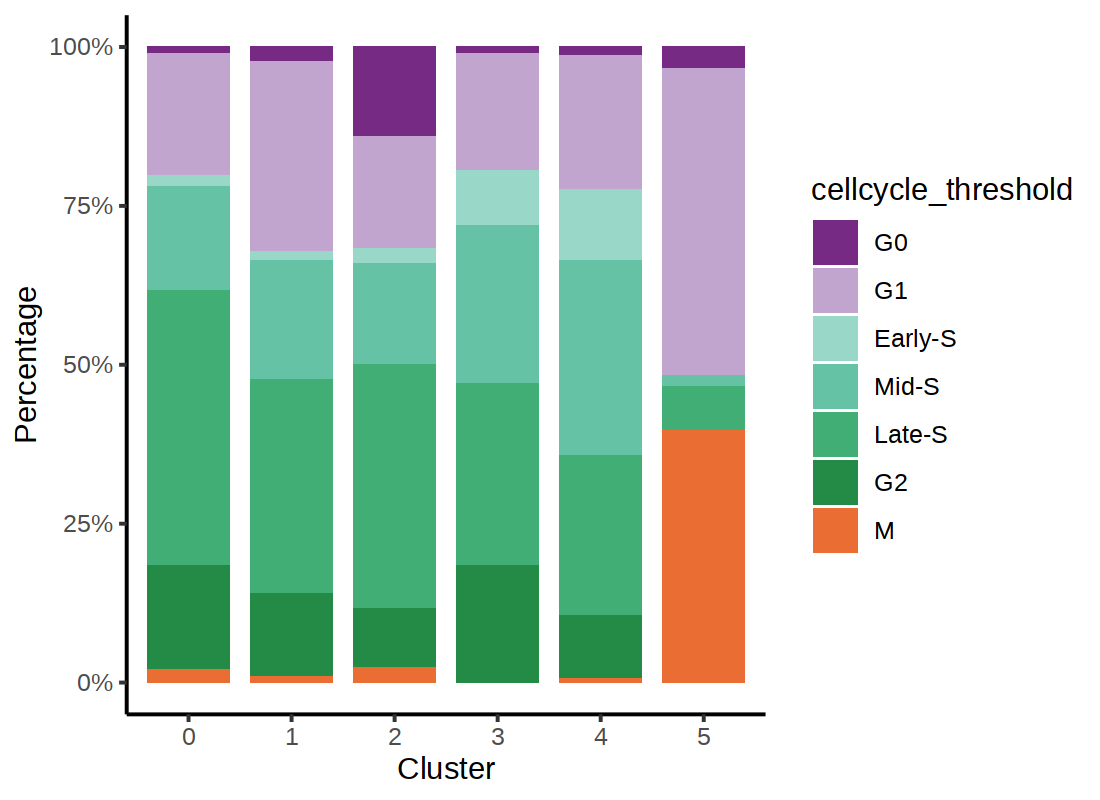

In [86]:
options(repr.plot.width=5.5, repr.plot.height=4)
cellcyclecolors = c("G0"="#762a83","G1"="#c2a5cf","Early-S"="#99d8c9","Mid-S"="#66c2a4","Late-S"="#41ae76","G2"="#238b45","M"="#ea6e34","Unknown"="gray")
esc@meta.data$cellcycle_threshold <- factor(esc@meta.data$cellcycle_threshold, levels=c("G0","G1","Early-S","Mid-S","Late-S","G2","M"))
esc@meta.data %>% group_by(seurat_clusters,cellcycle_threshold) %>% summarise(total=n()) %>% mutate(percentage=total/sum(total)) %>% 
    ggplot(aes(x=seurat_clusters, y=percentage, fill=cellcycle_threshold)) + geom_bar(stat="identity",width=0.8) + 
    scale_fill_manual( values = cellcyclecolors) +
    scale_y_continuous(labels = scales::percent)+ theme_classic() + xlab("Cluster") + ylab("Percentage")

In [44]:
esc <- esc %>% subset(seurat_clusters != 5 & cellcycle_threshold != "M")

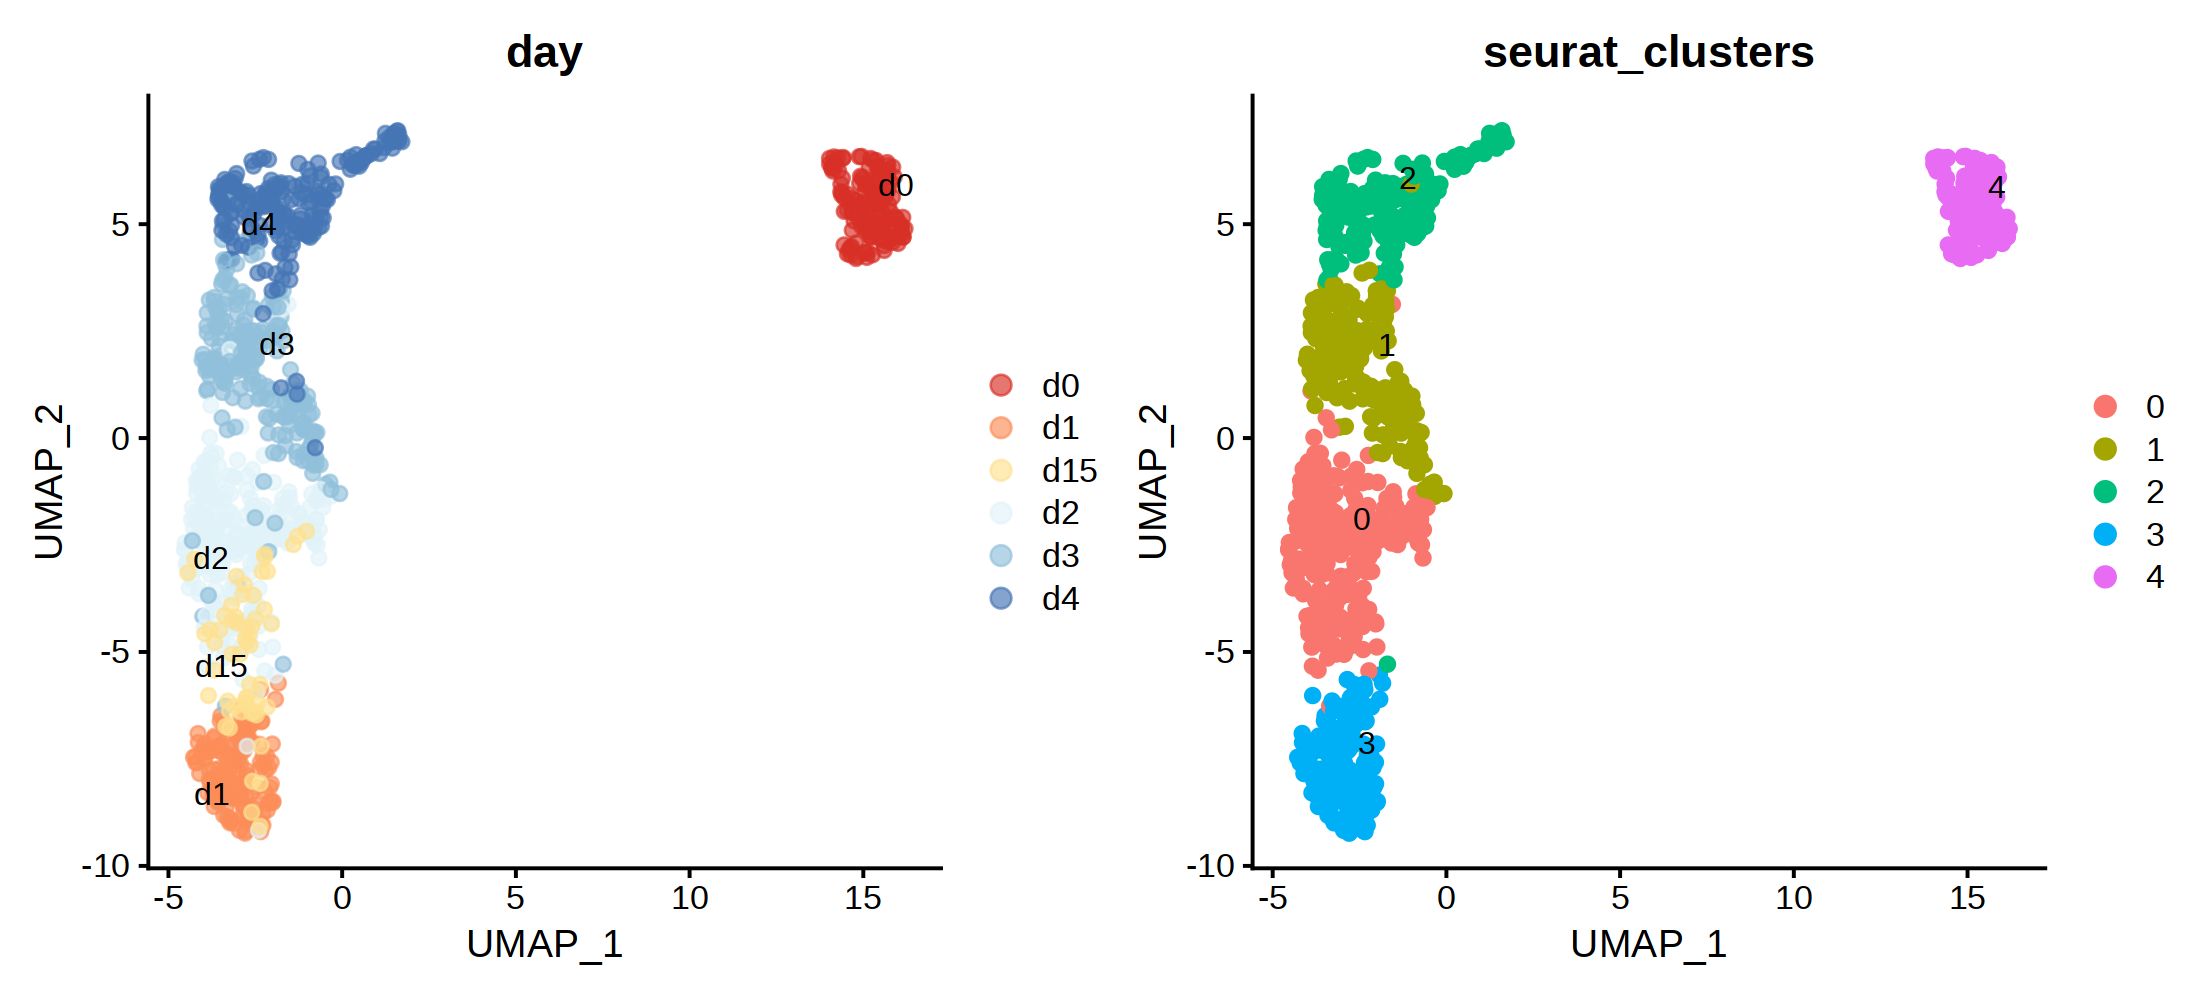

In [45]:
options(repr.plot.width=11, repr.plot.height=5)
p1 <- DimPlot(esc, reduction = "umap", group.by = 'day', label = T, pt.size = 2, label.size = 4,repel = T,cols=alpha(colors,0.66))
p2 <- DimPlot(esc, reduction = "umap", group.by = 'seurat_clusters', label = T, pt.size = 2, label.size = 4,repel = T)
p1 | p2

In [ ]:
esc

An object of class Seurat 
64478 features across 1029 samples within 2 assays 
Active assay: SCT (26493 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap

In [48]:
# saveRDS(esc, "./RDS/esc_withoutM_1029.rds")

In [3]:
esc <- readRDS("./RDS/esc_withoutM_1029.rds")

# plot

In [87]:
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
p1 <- DimPlot(esc, reduction = "umap", group.by = 'day', label = T, pt.size = 1.5, label.size = 0,repel = T,cols=alpha(colors,1)) + labs(title = "") + xlab("RNA UMAP 1") + ylab("RNA UMAP 2")
p2 <- DimPlot(esc, reduction = "umap", group.by = 'cellcycle_threshold', label = F, pt.size = 2, repel = T,cols=alpha(cellcyclecolors,1)) + labs(title = "") + xlab("RNA UMAP 1") + ylab("RNA UMAP 2")
p3 <- DimPlot(esc, reduction = "umap", group.by = 'seurat_clusters', label = T, pt.size = 1.5, label.size = 0,repel = T) + labs(title = "") + xlab("RNA UMAP 1") + ylab("RNA UMAP 2")
p4 <- esc@meta.data %>% group_by(seurat_clusters,cellcycle_threshold) %>% summarise(total=n()) %>% mutate(percentage=total/sum(total)) %>% 
    ggplot(aes(x=seurat_clusters, y=percentage, fill=cellcycle_threshold)) + geom_bar(stat="identity",width=0.8) + 
    scale_fill_manual( values = cellcyclecolors) +
    scale_y_continuous(labels = scales::percent)+ theme_classic() + xlab("Cluster") + ylab("Percentage") + labs(fill = "Cell cycle")

`summarise()` has grouped output by 'seurat_clusters'. You can override using
the `.groups` argument.


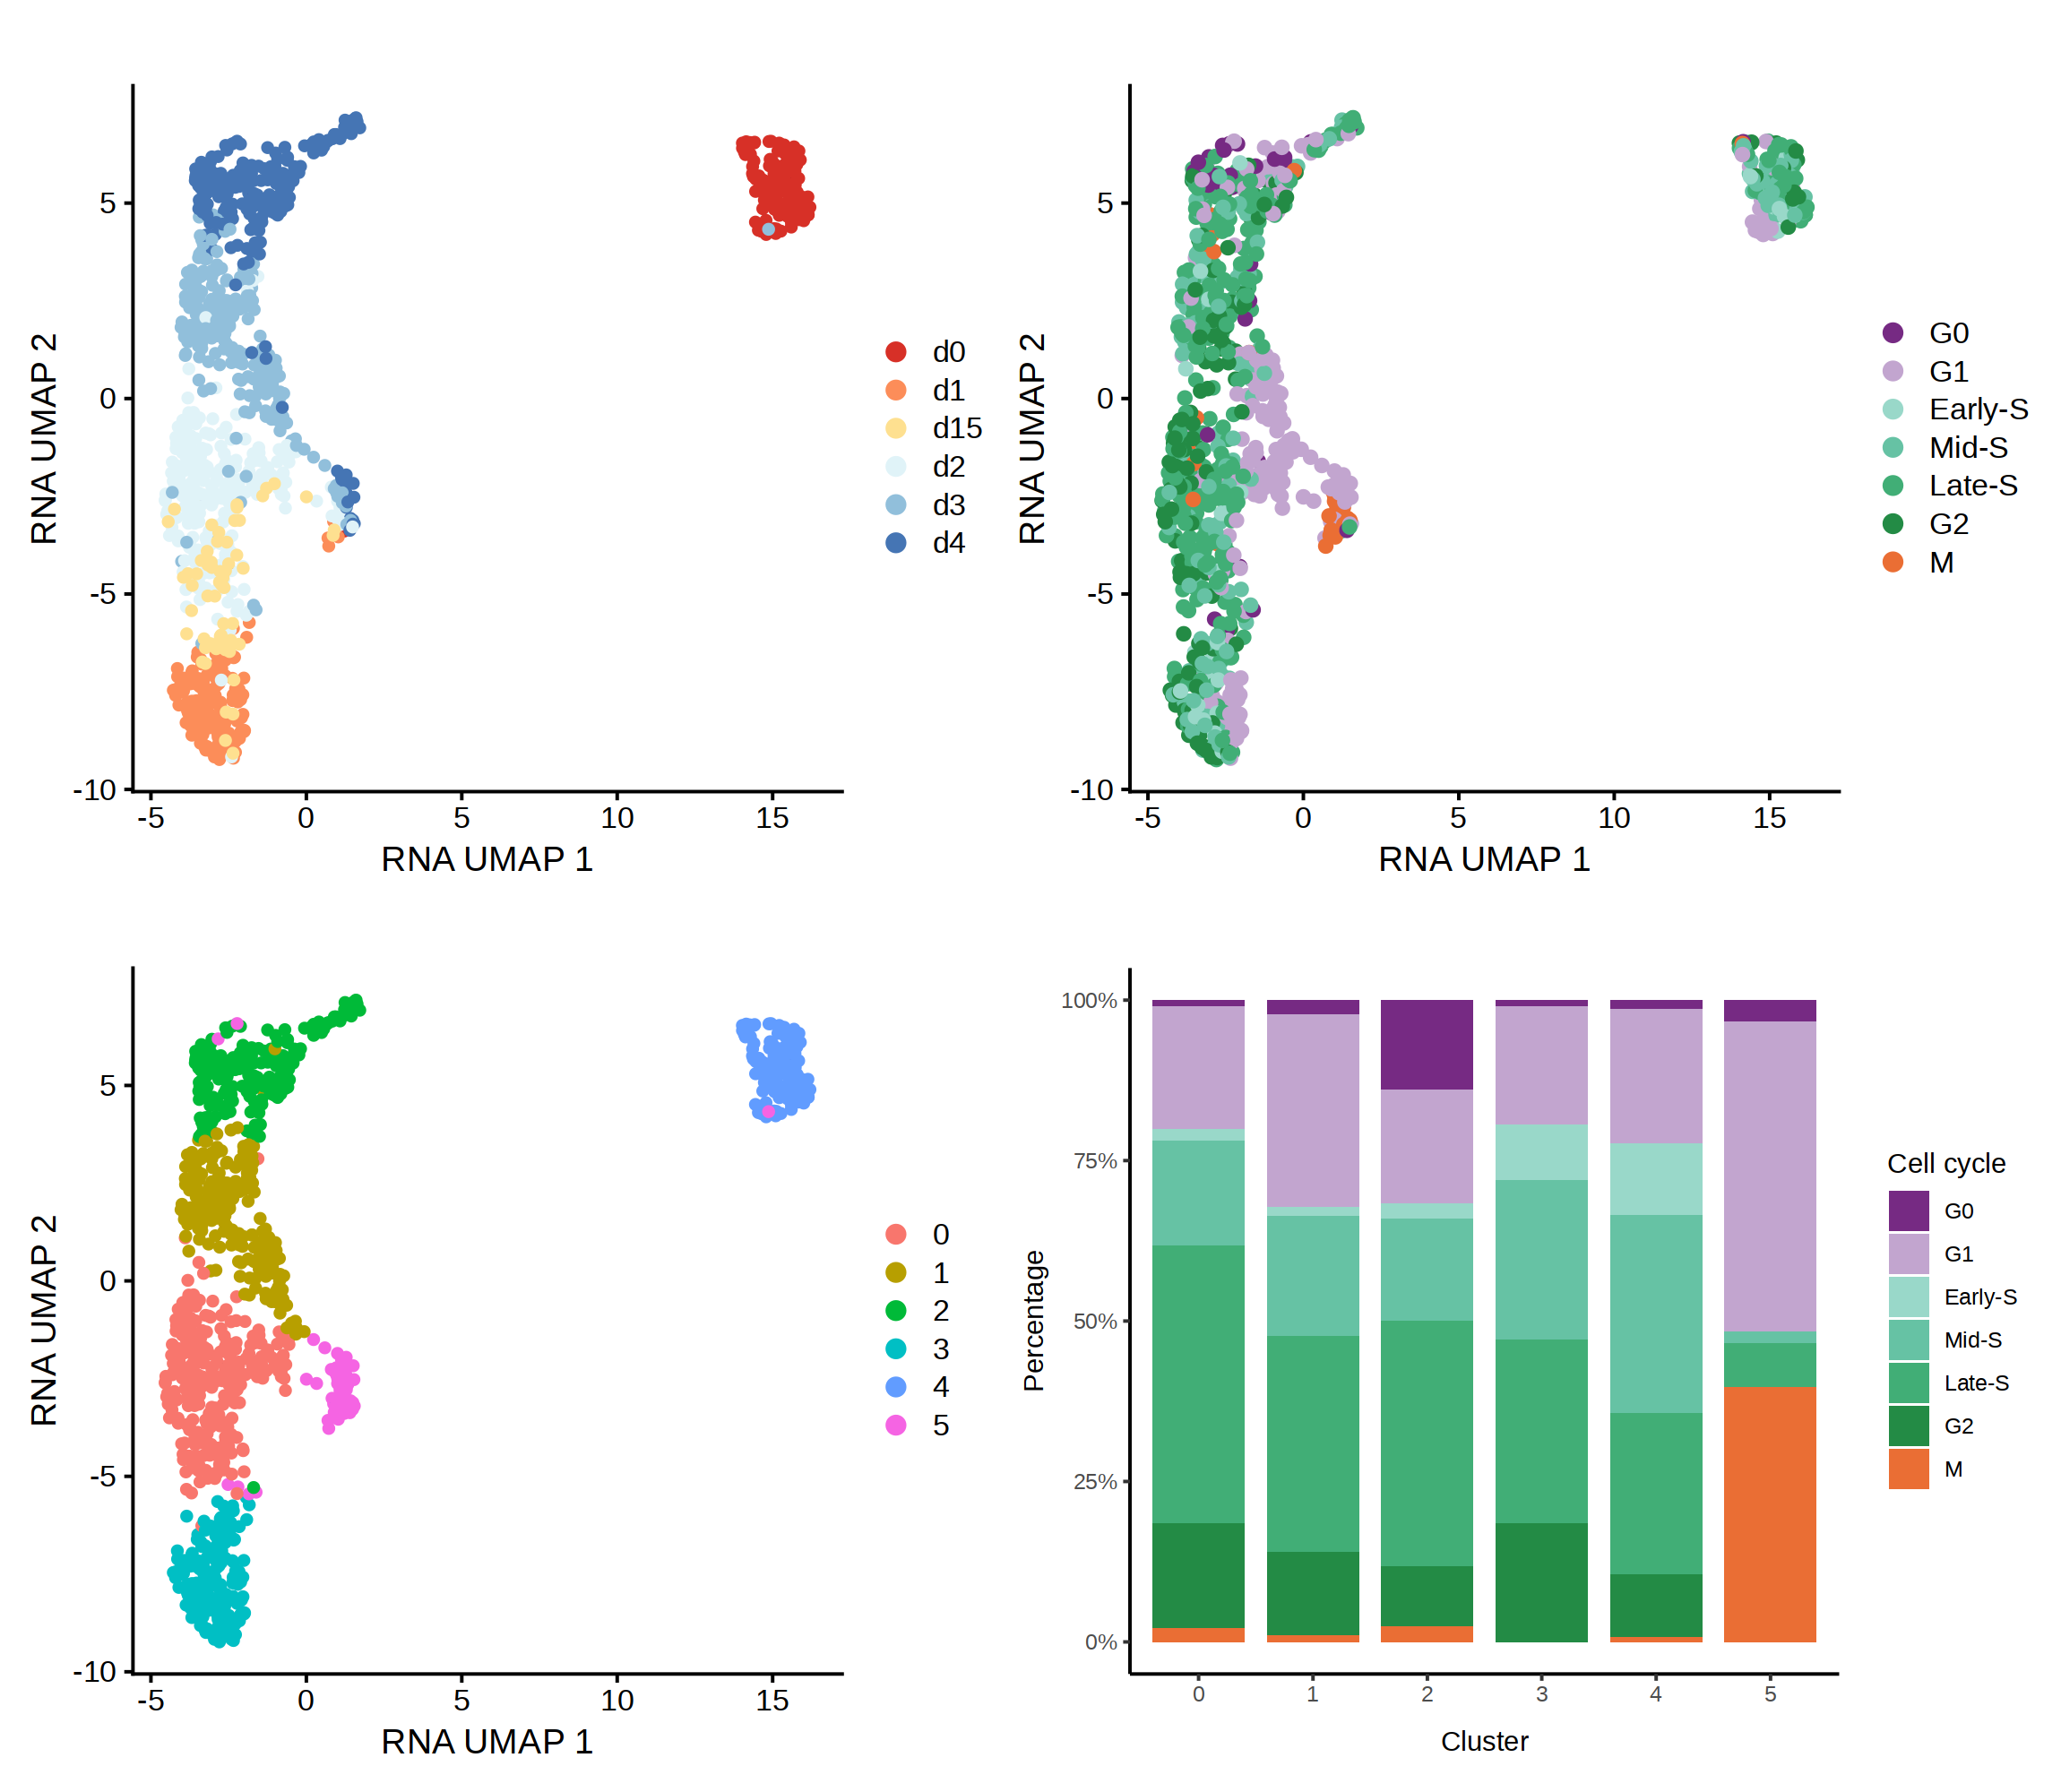

In [88]:
options(repr.plot.width=11.5, repr.plot.height=10)
combined_plot <- (p1 + p2 + p3 + p4) + plot_layout(ncol = 2)
combined_plot

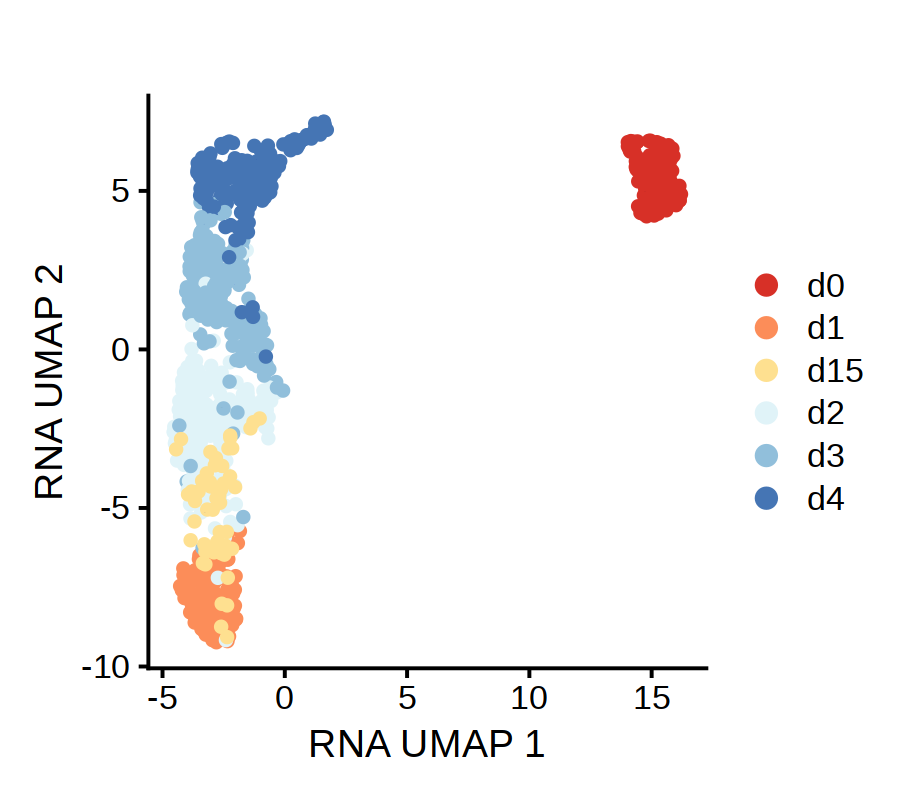

In [5]:
options(repr.plot.width=4.5, repr.plot.height=4, repr.plot.res = 200)
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
DimPlot(esc, reduction = "umap", group.by = 'day', label = T, pt.size = 1.5, label.size = 0,repel = T,cols=alpha(colors,1)) + labs(title = "") + xlab("RNA UMAP 1") + ylab("RNA UMAP 2")

In [18]:
options(repr.plot.width = 10,repr.plot.height=6,repr.plot.res = 200)
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
p1 <- VlnPlot(object = esc, features = c("Xist"), group.by = 'day',cols=alpha(colors,0.8),pt.size=0) + xlab("") + theme(legend.position = "none")
p2 <- VlnPlot(object = esc, features = c("Tsix"), group.by = 'day',cols=alpha(colors,0.8),pt.size=0) + xlab("") + ylab("") + theme(legend.position = "none")
p3 <- VlnPlot(object = esc, features = c("Dnmt3a"), group.by = 'day',cols=alpha(colors,0.8),pt.size=0) + xlab("") + theme(legend.position = "none")
p4 <- VlnPlot(object = esc, features = c("Sox2"), group.by = 'day',cols=alpha(colors,0.8),pt.size=0) + xlab("") + theme(legend.position = "none")
p5 <- VlnPlot(object = esc, features = c("Nanog"), group.by = 'day',cols=alpha(colors,0.8),pt.size=0) + xlab("") + theme(legend.position = "none")
p6 <- VlnPlot(object = esc, features = c("Esrrb"), group.by = 'day',cols=alpha(colors,0.8),pt.size=0) + xlab("")+ theme(legend.position = "none")

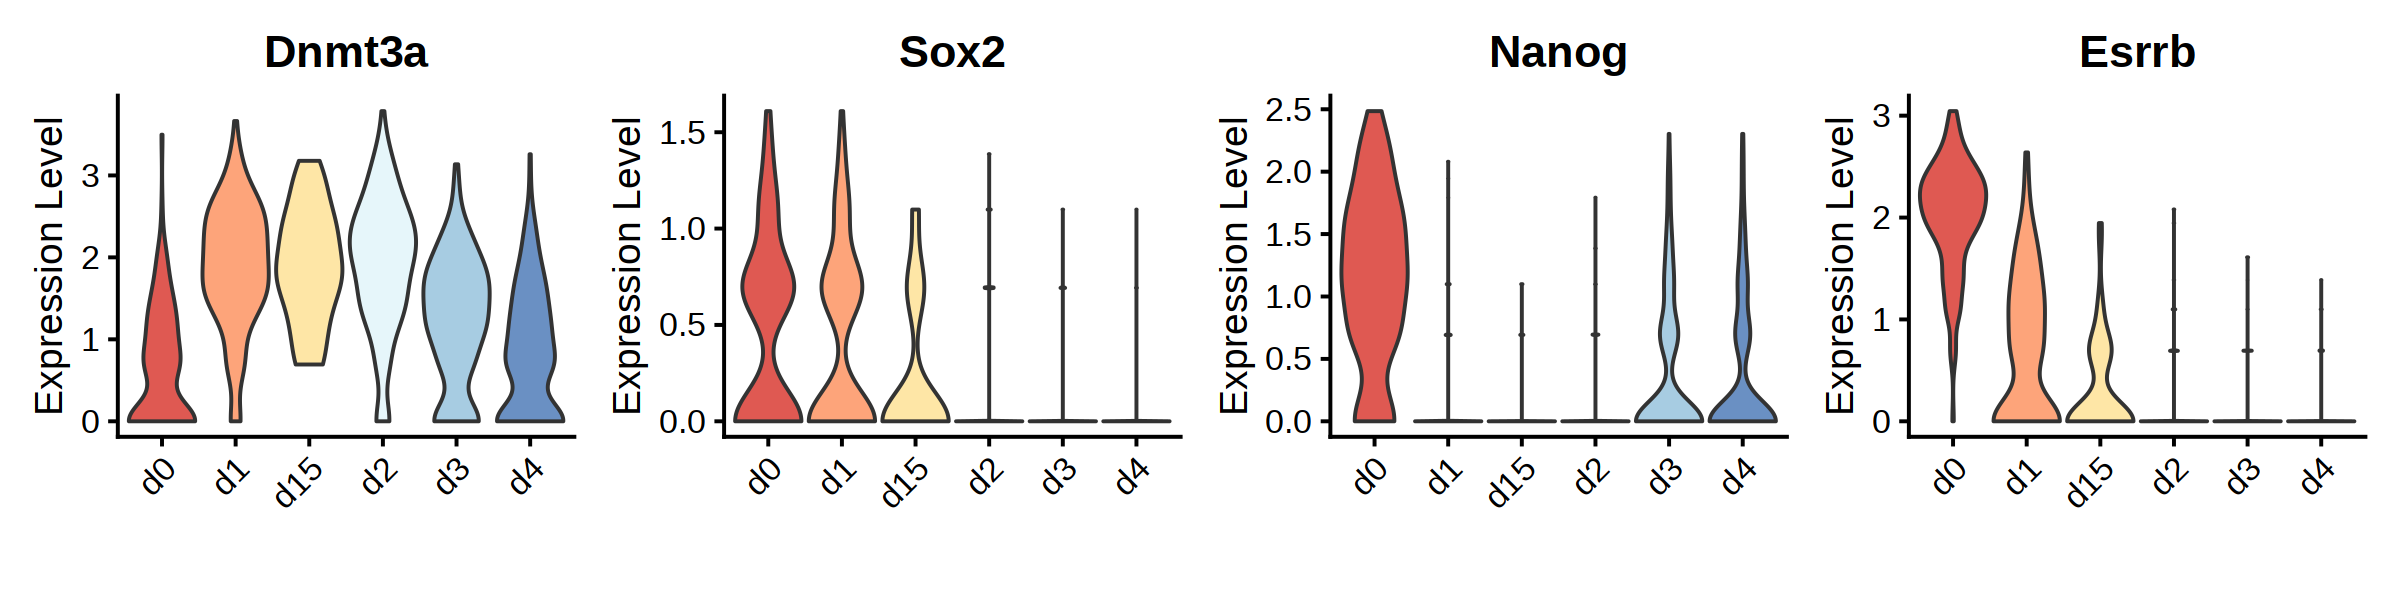

In [19]:
options(repr.plot.width=12, repr.plot.height=3,repr.plot.res = 200)
combined_plot <- (p3 + p4 + p5 + p6) + plot_layout(ncol = 4)
combined_plot

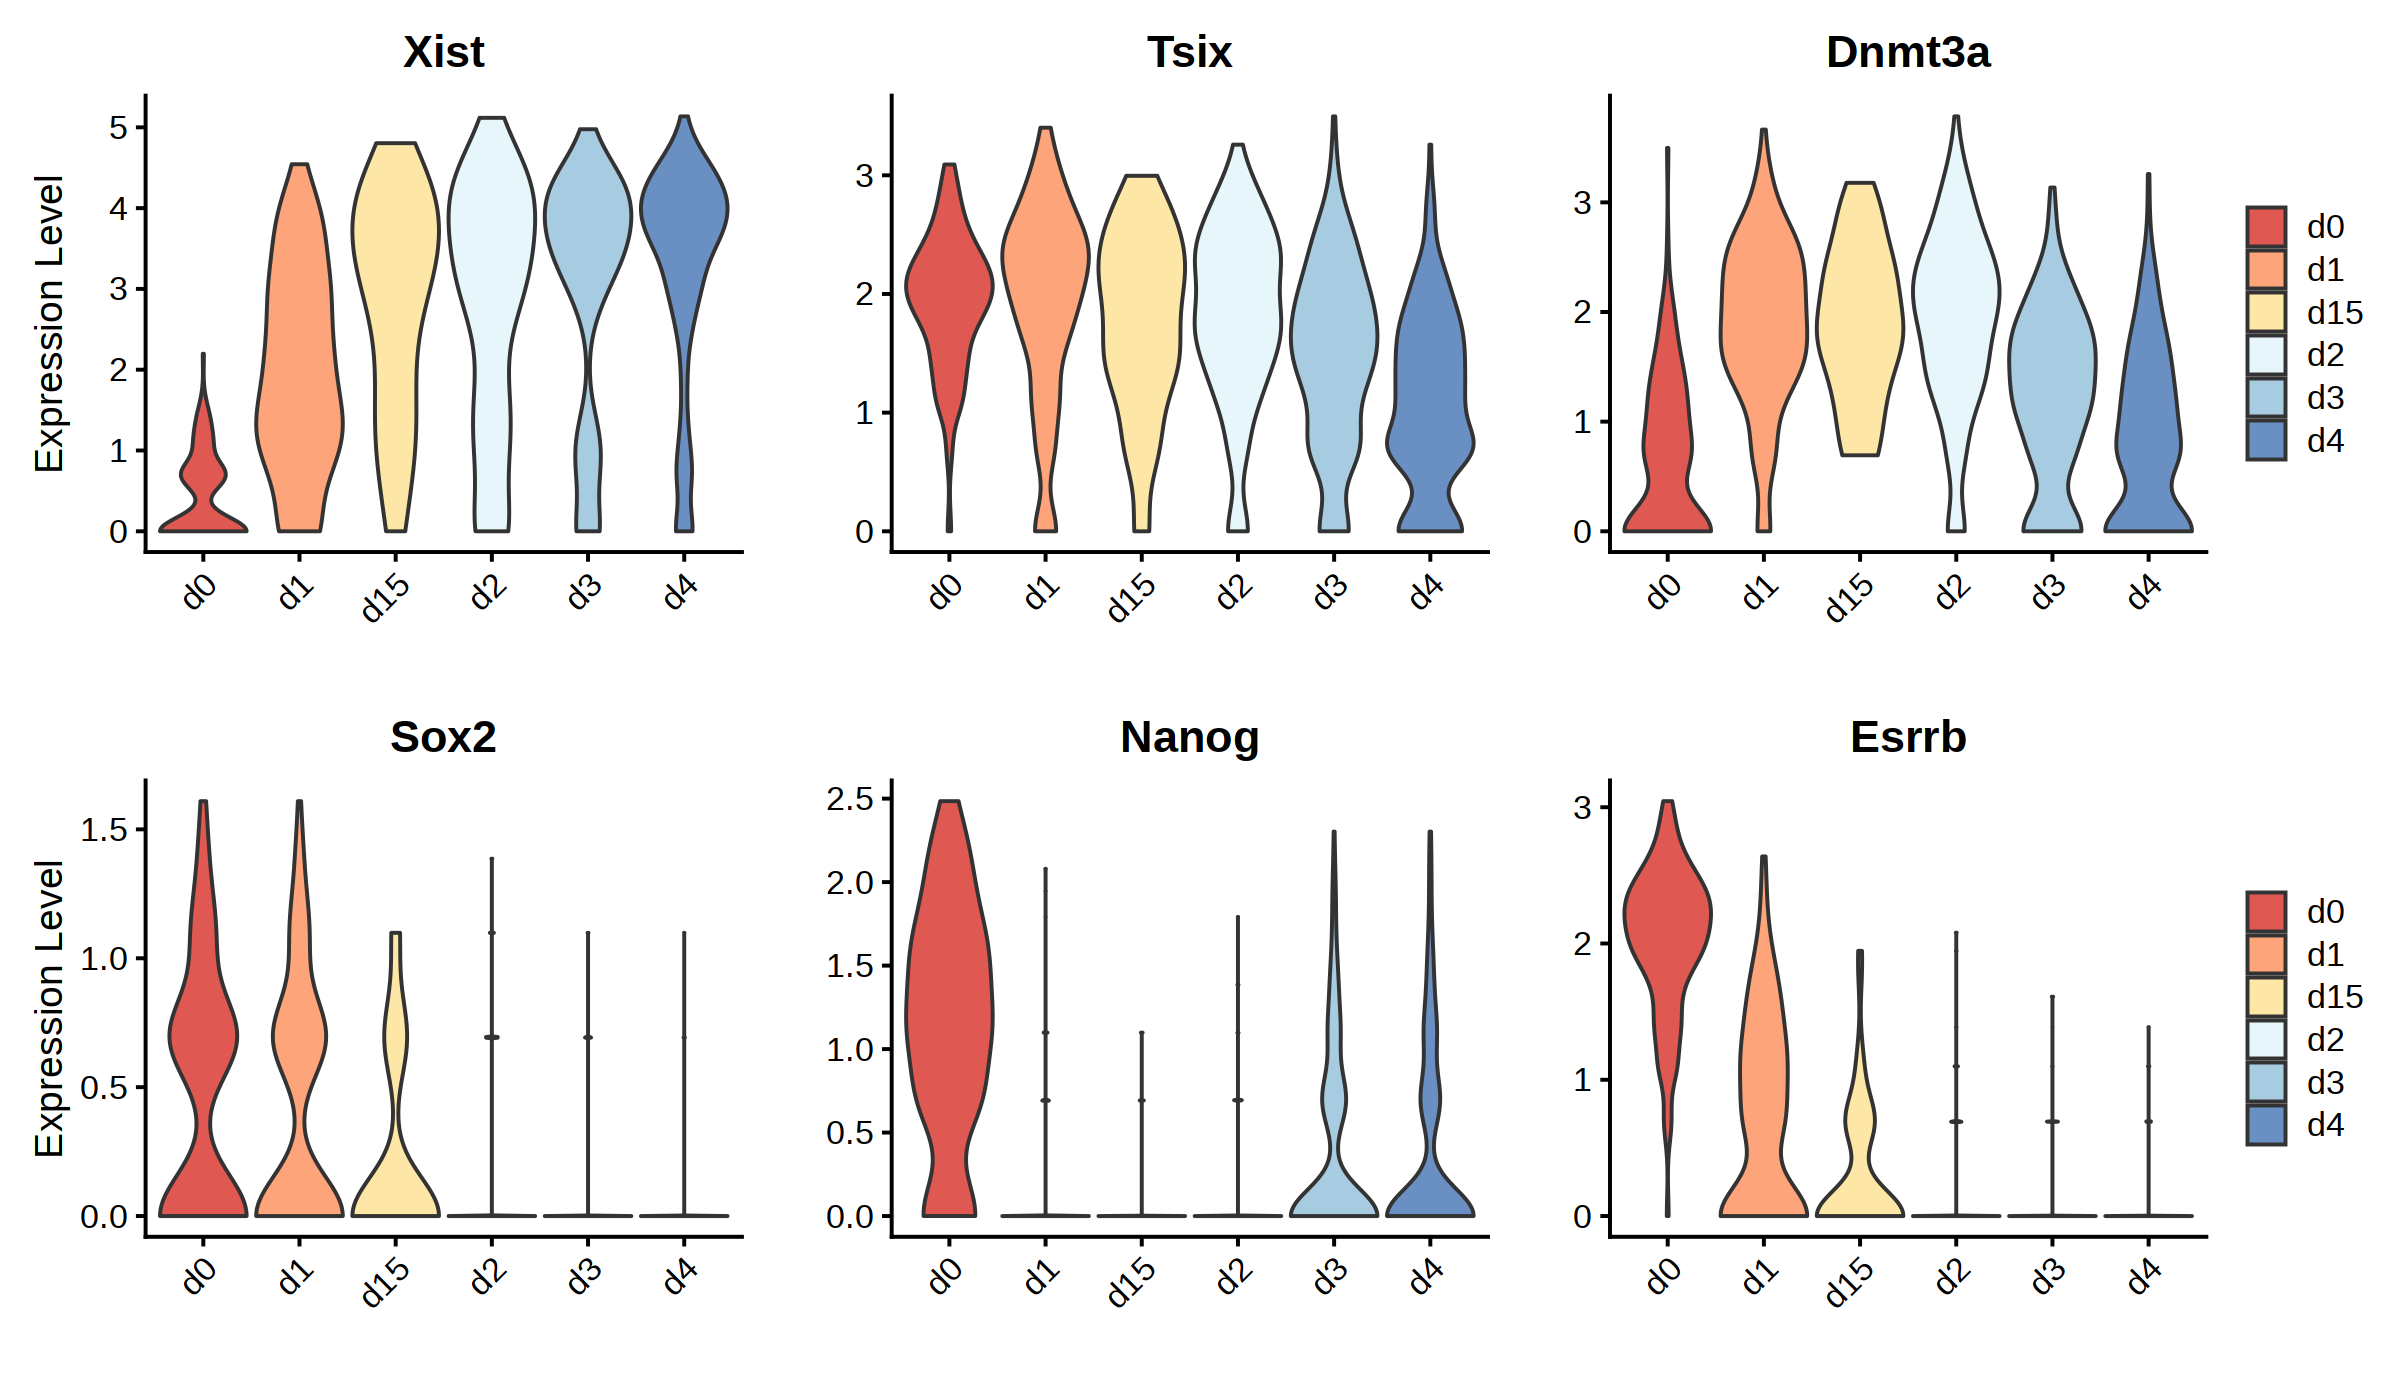

In [55]:
options(repr.plot.width=12, repr.plot.height=7)
combined_plot <- (p1 + p2 + p3 + p4 + p5 + p6) + plot_layout(ncol = 3)
combined_plot

In [ ]:
# ggsave("./cellcycle_related.png", combined_plot, width = 12, height = 10)